### Importing necessary modules for our project

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

### Presenting the data as a table in our launcher 

In [2]:
data = pd.read_csv("forbes.csv")
data

,rank,personName,netWorth,age,countryOfCitizenship,source-column,category
0,1.0,Jeff Bezos,$177 B,57.0,United States,Amazon,Technology
1,2.0,Elon Musk,$151 B,49.0,United States,"Tesla, SpaceX",Automotive
2,3.0,Bernard Arnault & family,$150 B,72.0,France,LVMH,Fashion & Retail
3,4.0,Bill Gates,$124 B,65.0,United States,Microsoft,Technology
4,5.0,Mark Zuckerberg,$97 B,36.0,United States,Facebook,Technology
...,...,...,...,...,...,...,...
1195,1174.0,"Henry Sy, Jr.",$2.7 B,68.0,Philippines,diversified,Diversified
1196,1174.0,Teresita Sy-Coson,$2.7 B,70.0,Philippines,diversified,Diversified
1197,1174.0,Tao Yuequn,$2.7 B,61.0,China,Contact Lens,Fashion & Retail
1198,1174.0,Tong Jinquan,$2.7 B,66.0,China,real estate,Real Estate


This shows that our dataset has 7 columns with 1200 rows. 

### Removing null data and changing the data type of some columns

In [3]:
data.isnull()

,rank,personName,netWorth,age,countryOfCitizenship,source-column,category
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1195,False,False,False,False,False,False,False
1196,False,False,False,False,False,False,False
1197,False,False,False,False,False,False,False
1198,False,False,False,False,False,False,False


While chekcing the dataset for null values it was found that there were no null values in the dataset which indicates that we can use all the data in the dataset for our analysis. Having a complete dataset is very beneficial to get better results while analyzing the data.

In [4]:
data['netWorth'] = data['netWorth'].str.strip('$')
data['netWorth'] = data['netWorth'].str.strip('B')
data['netWorth'] = data['netWorth'].astype(float)


Removing the string symbols and letters in our networth column for easier mathematical operations on the dataset.

### Category Wise Distribution Count of Data 

In [5]:
data['category'].value_counts()

Finance & Investments         171
Technology                    161
Fashion & Retail              133
Manufacturing                 118
Food & Beverage                99
Real Estate                    95
Healthcare                     84
Diversified                    73
Media & Entertainment          50
Energy                         42
Automotive                     33
Metals & Mining                33
Service                        31
Construction & Engineering     17
Gambling & Casinos             16
Logistics                      16
Telecom                        15
Sports                         13
Name: category, dtype: int64

This shows that most of the billioniares are from Finance & Investment sector with 171 of them. Sports has the lowest number of billioniares of 13. 


### Oldest Billioniares in the World


In [6]:
oldest_person = data.sort_values(by=['age'], ascending=False).head(10)
oldest_person

,rank,personName,netWorth,age,countryOfCitizenship,source-column,category
170,171.0,Robert Kuok,12.6,97.0,Malaysia,"palm oil, shipping, property",Diversified
729,727.0,Masatoshi Ito,4.0,96.0,Japan,retail,Fashion & Retail
594,589.0,Ted Lerner & family,4.8,95.0,United States,real estate,Real Estate
1131,1111.0,David Gottesman,2.8,94.0,United States,investments,Finance & Investments
438,432.0,Stef Wertheimer & family,6.2,94.0,Israel,metalworking tools,Manufacturing
683,680.0,Traudl Engelhorn & family,4.2,94.0,Germany,"pharmaceuticals, medical equipment",Healthcare
440,440.0,Charles Dolan & family,6.1,94.0,United States,cable television,Media & Entertainment
79,80.0,Goh Cheng Liang,21.7,93.0,Singapore,paints,Manufacturing
691,680.0,James Irving,4.2,93.0,Canada,diversified,Diversified
46,47.0,Lee Shau Kee,31.7,93.0,Hong Kong,real estate,Real Estate


In [7]:
oldest_person['countryOfCitizenship'].value_counts()

United States    3
Malaysia         1
Japan            1
Israel           1
Germany          1
Singapore        1
Canada           1
Hong Kong        1
Name: countryOfCitizenship, dtype: int64

The table above shows the list of the 10 oldest billioniares from the world. This shows that 3 of the oldest billioniares were from United States and the oldest billoniare is from Malaysia, "Robert Kuok" who is 97 years of age. The graph below shows the result being shown in barplot. 

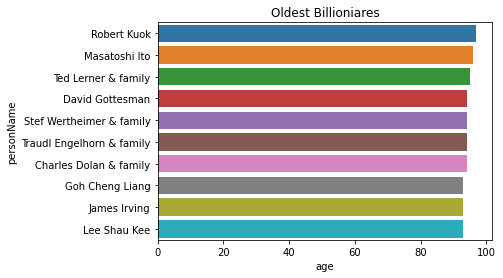

In [8]:
sns.barplot(y="personName", x="age", data=oldest_person);
plt.title('Oldest Billioniares');

### Wealthiest Person in the List 

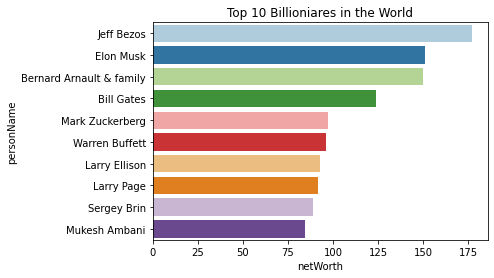

In [9]:
richest = data.sort_values(by=['netWorth'], ascending=False).head(10)
sns.barplot(y='personName', x='netWorth', palette='Paired', data=richest);
plt.title('Top 10 Billioniares in the World');

The barplot shows the top 10 billioniares in the world. This shows that Jeff Bezos is the richest person in the world with net worth of about 180 billion dollars.

### Categories of Billioniares 

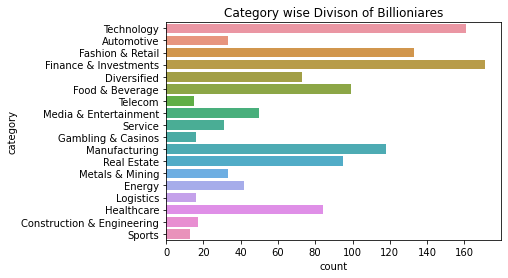

In [10]:
sns.countplot(y = data.category);
plt.title('Category wise Divison of Billioniares');

The count plot above shows the number of billioniares according to their industry. The data shows that Finance & Investments sector has the highest number of billioniares followed by Technology field. Sports industries has lowest number of billioniares.

### Billioniare's Country

In [11]:
country = data['countryOfCitizenship'].value_counts().head()
country

United States    382
China            224
Germany           74
Russia            53
India             47
Name: countryOfCitizenship, dtype: int64

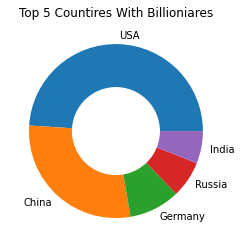

In [12]:
index = ['USA', 'China', 'Germany', 'Russia', 'India']
plt.pie(country, labels=index)
plt.title("Top 5 Countires With Billioniares")
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle);

The pie diagram above shows the top 5 countries with billioniares. We can see that most of the billioniares are from USA which are followed by China.

### Japanese Billioniares Data 

This query was runed to find out the billioniares who are from Japan. This shows that there are 15 billioniares from Japan in the list. Overally, 29th ranked Masayoshi Son is the richest person in Japan with a networth of 45.4B. 

In [13]:
japan = data.query("countryOfCitizenship == 'Japan'")
japan

,rank,personName,netWorth,age,countryOfCitizenship,source-column,category
28,29.0,Masayoshi Son,45.4,63.0,Japan,"internet, telecom",Telecom
30,31.0,Tadashi Yanai & family,44.1,72.0,Japan,fashion retail,Fashion & Retail
62,62.0,Takemitsu Takizaki,25.8,75.0,Japan,sensors,Manufacturing
282,274.0,Shigenobu Nagamori,8.7,76.0,Japan,motors,Manufacturing
314,311.0,Takahisa Takahara,7.9,59.0,Japan,personal care goods,Fashion & Retail
396,391.0,Hiroshi Mikitani,6.7,56.0,Japan,online retail,Fashion & Retail
542,539.0,Akio Nitori,5.2,77.0,Japan,home furnishings,Fashion & Retail
583,574.0,Yasumitsu Shigeta,4.9,56.0,Japan,mobile phone retailer,Telecom
677,665.0,Takao Yasuda,4.3,71.0,Japan,retail,Fashion & Retail
729,727.0,Masatoshi Ito,4.0,96.0,Japan,retail,Fashion & Retail


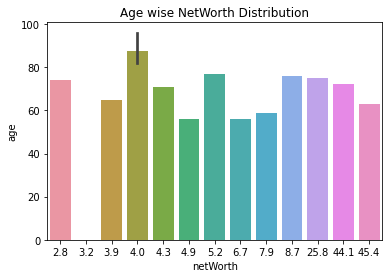

In [18]:
sns.barplot(data=japan, x="netWorth", y='age');
plt.title('Age wise NetWorth Distribution');

The bar plot above shows the age vs networth graph of the Japanese billioniares in the data. This shows that most of the people are above 40 years of age. 

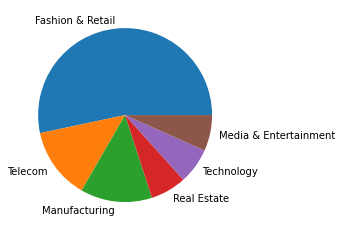

In [33]:
category = japan.category.value_counts()
index = ['Fashion & Retail', 'Telecom', 'Manufacturing', 'Real Estate', 'Technology', 'Media & Entertainment'];
plt.pie(category, labels=index);

The pie chart above shows the industires the billioniares from Japan have invested and earned their wealth from. This shows that 
most of the billioniares from Japan have invested a lot in Fashion and Retail sector. 

In [37]:
realestate = data.query("category == 'Real Estate'").head()
realestate
# investments = data.query("category == 'Real Estate'").value_counts()

,rank,personName,netWorth,age,countryOfCitizenship,source-column,category
46,47.0,Lee Shau Kee,31.7,93.0,Hong Kong,real estate,Real Estate
49,50.0,Yang Huiyan & family,29.6,39.0,China,real estate,Real Estate
52,53.0,Hui Ka Yan,27.7,62.0,China,real estate,Real Estate
100,100.0,Wu Yajun,18.3,57.0,China,real estate,Real Estate
103,104.0,Peter Woo,18.0,74.0,Hong Kong,real estate,Real Estate


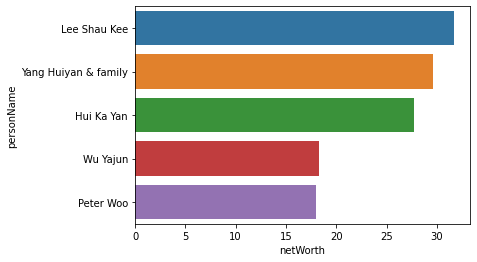

In [38]:
sns.barplot(x='netWorth', y='personName', data =realestate);

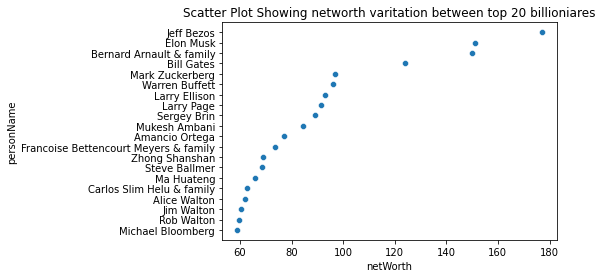

In [17]:
data2 = data.head(20)
sns.scatterplot(x='netWorth', y='personName', data=data2);
plt.title("Scatter Plot Showing networth varitation between top 20 billioniares");